# Research of ads sale apartments

This research is based on the data from Yandex Real State service that shows the ads for sale apartments in San Petersburg for several years. The task is to determine the market value of the real state and set the parameters that will allow me to build an automated system to track anomalies and fraudulent activities.

There are two types of data available for each apartment for sale. The first one is entered by the user, the second one is obtained automatically based on cartographic data. For example, the distance to the center, the airport, the nearest park, and reservoir.

In [1]:
import pandas as pd

import matplotlib as plt

import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\pinos\Desktop\statistics\real_estate_data.csv', 
                   
                   sep = '\t')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

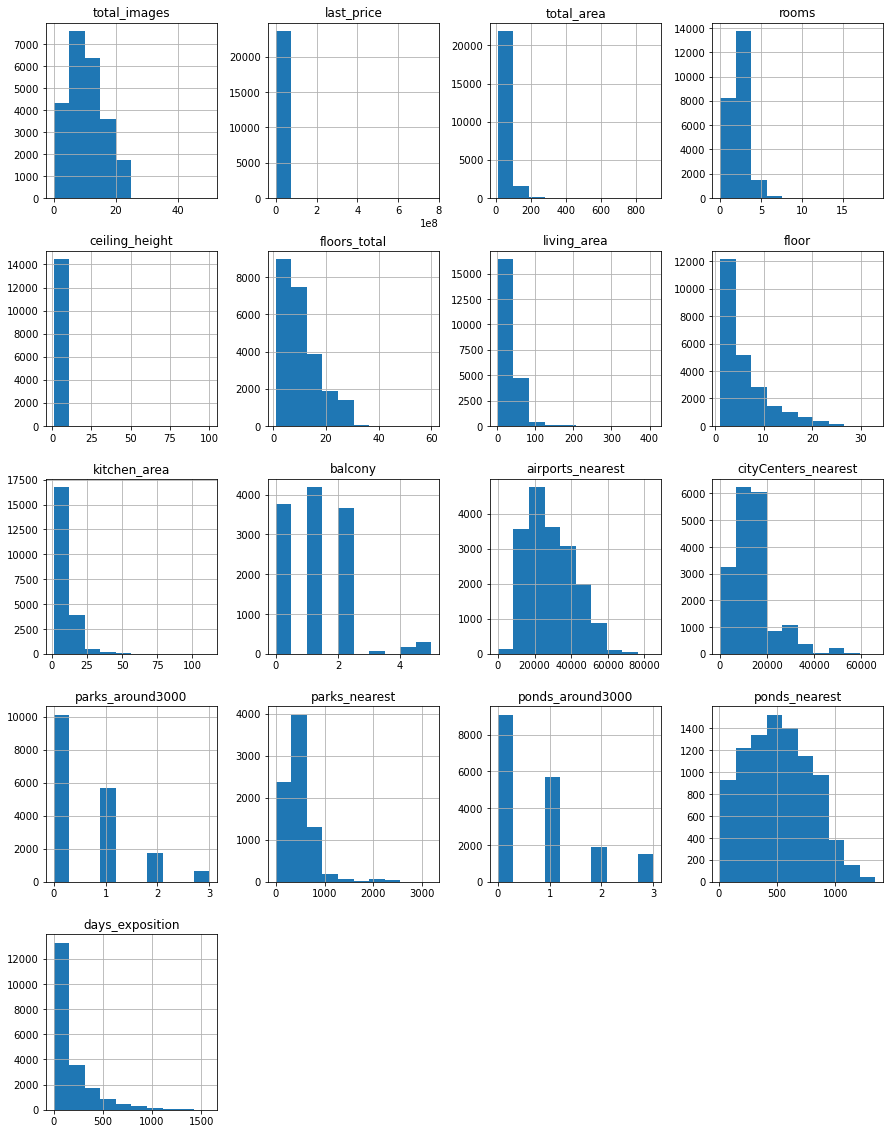

In [4]:
data.hist(figsize=(15, 20))

There are several things that require our attention, there are types of data that we would have to change them, measurements in meters that would be more comfortable in km. All that we are going to fix in the next steps.

# Data Preprocessing

First of all let's check the missing values.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

We write a function to see the missing values in percentages.

In [7]:
def percentages_missing():
    
    return data.isna().sum() / len(data) * 100

percentages_missing()

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

We see that there are columns with a lot of missing data, this may be due to various reasons, for example, the advertiser does not know the height of the ceiling. In other cases, such as the distance from the park, it may happen that the advertiser deliberately hides it to facilitate the sale, in case the apartment is very far away. The fact is, so far, we don't know. We're going to go piece by piece, solving each variable separately.

The columns showing the most data missing are is_apartment: 88 percent, park_nearest: 65 percent, pond_nearest: 61 percent, and the rest, from 13 to 38 percent. We are most concerned about those mentioned in the first three.

A good solution for the balcony is to assume that if it is not on the list, there is a high probability that the apartment doesn't have a balcony. We will fill it with the value 0.

In [8]:
data['balcony'].fillna(0, inplace=True)

We check the first of our changes.

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

For the variables living_area, and kitchen_area it would be ok keep them as it is because changing them can drive us to some analytical problems. The variable ceiling_height, we change it for the mean.

In [10]:
def filling(column):
    
    x = data[column].median()
    data[column] = data[column].fillna(x)

filling('ceiling_height')


# Working with Data Types

We change the variables kitchen_area, balcony, total_area, last_price, ceiling_height, floors_total, living_area, parks_around3000, ponds_around3000, ponds_nearest, parks_nearest and so on from float to int, since decimals for these columns do not make much sense. We will proceed from the assumption that there is no park or pond nearby.

In [11]:
super_list = [
      
    'parks_around3000',
    'parks_nearest',
    'ponds_around3000',
    'ponds_nearest',
    'last_price',
    'ceiling_height',               
    'floors_total',              
    'living_area',
    'total_area',
    'kitchen_area',
    'balcony',
    'airports_nearest',
    'cityCenters_nearest',
    'days_exposition'  
    
]

for i in super_list:
    
    try:
        
        data[i] = data[i].round().astype('int')
    
    except Exception as err:
        
        continue
        

Now we only have to take care of two variables: is_apartment, locality_name. locality_name let's logically switch to str and add quotes, is_apartment we fill in 0 and change its type to bool.

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(0).astype('bool')

In [13]:
data['locality_name'] = data['locality_name'].astype('str')

In the first_day_exposition variable, we will correct the date.

In [14]:
data['first_day_exposition'] = pd.to_datetime(
    
    data['first_day_exposition'], 
    
    format = '%Y-%m-%d'
)

In [15]:
# checking all the changes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  int32         
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  int32         
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [16]:
# looking for unique values in the locality_name column

data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [17]:
# counts values

data['locality_name'].value_counts()

Санкт-Петербург                   15721
посёлок Мурино                      522
посёлок Шушары                      440
Всеволожск                          398
Пушкин                              369
                                  ...  
поселок Гладкое                       1
посёлок городского типа Рябово        1
поселок Цвылёво                       1
поселок городского типа Рябово        1
посёлок Дзержинского                  1
Name: locality_name, Length: 365, dtype: int64

As we can see in value_counts, there are values that we need to change for better analysis. Now let's move on to correcting all the inaccuracies found.

In [18]:
locality_names = (['поселок', 'посёлок', 'городского типа', 'городской', 'коттеджный', 'станции', 
                   'при железнодорожной', 'садовое товарищество', 'садоводческое некоммерческое товарищество', 
                   'деревня', 'село'])

for i in range(len(data['locality_name'])):
    if pd.isna(data.loc[i, 'locality_name']) != True:
        for x in locality_names:
            if x in data.loc[i, 'locality_name']:
                data.loc[i, 'locality_name'] = data.loc[i, 'locality_name'].replace(x, '', 1)
                data.loc[i, 'locality_name'] = data.loc[i, 'locality_name'].lstrip()

In [19]:
data['locality_name'].value_counts()

Санкт-Петербург            15721
Мурино                       590
Кудрово                      472
Шушары                       440
Всеволожск                   398
                           ...  
Пельгора                       1
Каложицы                       1
Платформа 69-й километр        1
Почап                          1
Дзержинского                   1
Name: locality_name, Length: 306, dtype: int64

We checked and replaced implicit duplicates in the names of localities.

We will deal with all the anomalies. To do this, we will use the description method applied to last_price, one of the most important variables in the dataset.

In [20]:
data['last_price'].describe()

data['last_price'].count()

23699

In [21]:
print('{:f}'.format(1.219000e+04))
print('{:f}'.format(7.630000e+08))
print('{:f}'.format(3.400000e+06))
print('{:f}'.format(4.650000e+06))
print('{:f}'.format(6.800000e+06))

12190.000000
763000000.000000
3400000.000000
4650000.000000
6800000.000000


Since we can estimate the minimum and maximum, it is very suspicious that housing costs 12,000 rubles or 763 million rubles. So we are going to remove these values from the dataset.

In [22]:
data = data.drop(data['last_price'].idxmin()).reset_index(drop=True)

data = data.drop(data['last_price'].idxmax()).reset_index(drop=True)

In [23]:
data['last_price'].describe()

count    2.369700e+04
mean     6.509902e+06
std      9.715219e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      4.200000e+08
Name: last_price, dtype: float64

After removing the minimum and maximum, we see that we still have a suspiciously high maximum. Thus, we plan to visualize those houses whose cost exceeds 100 million rubles.

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

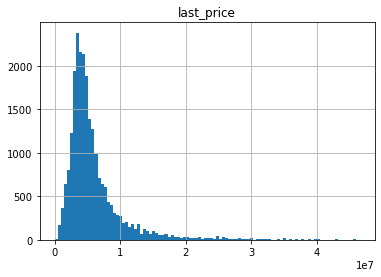

In [24]:
data.hist('last_price', bins=100, range=(0, data['last_price'].median()*10))

As the graph shows, housing worth more than 20 million rubles does not seem to be enough. However, we will zoom in to see how many of them exceed 30 million.

Text(0.5, 1.0, 'Housing worth more than 30 million rubles\n')

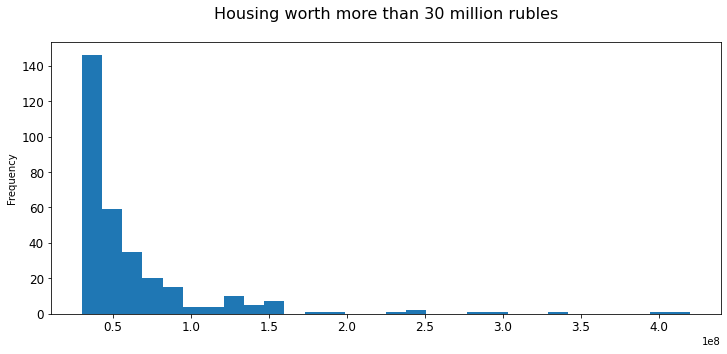

In [25]:
(data.query('last_price > 30000000')['last_price']
     .plot(kind= 'hist',
           bins=30, 
           figsize=(12,5), 
           legend = False, 
           fontsize = 12)
     .set_title('Housing worth more than 30 million rubles' + "\n", 
                fontsize = 16, 
                color = 'Black'))

As we can see, there are very few houses worth more than 30 million rubles, so we are going to exclude them from the analysis without fear that this will affect the result.

In [26]:
data = data.drop(
    
    data.query('last_price > 30000000')
    
    .index).reset_index(drop=True)

In [27]:
data['last_price'].describe()

count    2.338200e+04
mean     5.743362e+06
std      4.041054e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.650000e+06
max      3.000000e+07
Name: last_price, dtype: float64

In [28]:
100 - ((data['last_price'].count() / 23699) * 100) 

1.3376091818220175

We just deleted 1.3% of the data in this column.

We turn to the study of the total square meters of housing.

In [29]:
data['total_area'].describe()

count    23382.000000
mean        58.264862
std         28.223699
min         12.000000
25%         40.000000
50%         52.000000
75%         68.000000
max        461.000000
Name: total_area, dtype: float64

In [30]:
data['rooms'].describe()

count    23382.000000
mean         2.040458
std          1.029228
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

There are two values that catch the eye: one is the minimum value of 12 meters, and the other is the maximum value of 460. At least in Moscow, houses with a length of only 12 meters are for sale, and in Spain houses of 460 meters are usually sold. It can be rented, but we risk that such housing in St. Petersburg really exists. So we'll leave it as it is.

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

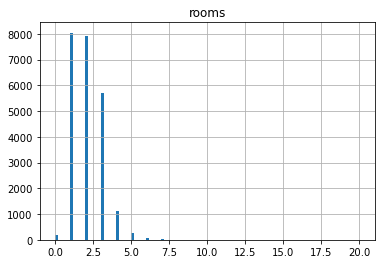

In [31]:
data.hist('rooms', bins=100, range=(0, data['rooms'].median()*10))

We see how few houses have an area of more than 5 meters. We follow the same steps as above to make sure before deleting non-standard values.

Text(0.5, 1.0, 'Houses with more than 5 bedrooms\n')

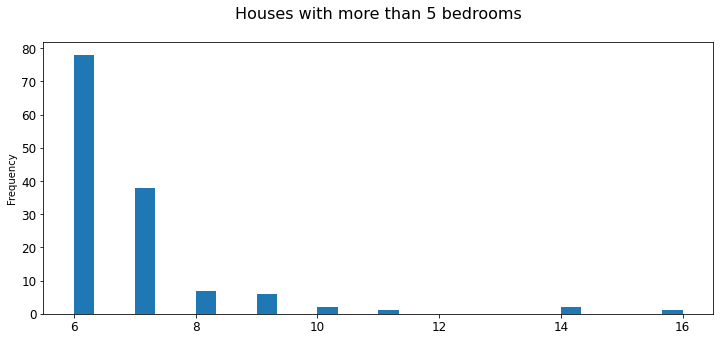

In [33]:
(data.query('rooms > 5')['rooms']
 
     .plot(kind= 'hist',
           
           bins=30, 
           
           figsize=(12,5), 
           
           legend = False, 
           
           fontsize = 12)
 
     .set_title('Houses with more than 5 bedrooms' + "\n",
                
                fontsize = 16, 
                
                color = 'Black'))

In [34]:
data = data.drop(data.query('rooms > 10').index).reset_index(drop=True)

It can be seen that there is almost no houses with that parameter, so we are going to exclude those houses with more than 7 rooms.

In [35]:
data = data.drop(
    
    data.query('rooms > 7')
    
    .index).reset_index(drop=True)

In [36]:
data['rooms'].describe()

count    23363.000000
mean         2.034199
std          1.003795
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

In [37]:
100 - ((data['rooms'].count() / 23363) * 100) 

0.0

We haven't eliminated hardly anything in percentage in this column.

In [38]:
data['ceiling_height'].describe()

count    23363.000000
mean         2.889055
std          1.040866
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max        100.000000
Name: ceiling_height, dtype: float64

As for ceilings, it is absolutely unlikely to find houses one meter high or 100 meters high. Let's take a closer look at these parameters.

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

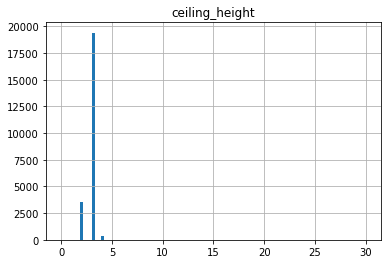

In [39]:
data.hist(
    
    'ceiling_height', 
    
    bins=100, 
    
    range=(0, data['ceiling_height'].median()*10))

Text(0.5, 1.0, 'Houses with a ceiling height more than 5 meters\n')

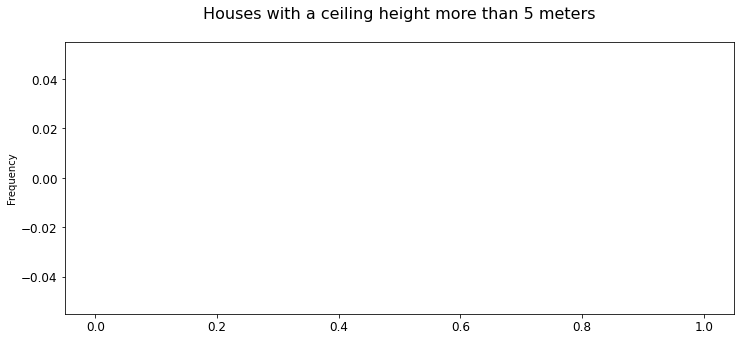

In [51]:
(data.query('ceiling_height > 5')['ceiling_height']
 
     .plot(kind= 'hist',
           
           bins=30, 
           
           figsize=(12,5), 
           
           legend = False, 
           
           fontsize = 12)
 
     .set_title('Houses with a ceiling height more than 5 meters' + "\n", 
                
                fontsize = 16, 
                
                color = 'Black'))

Text(0.5, 1.0, 'Houses with a ceiling height of less than 2 meters\n')

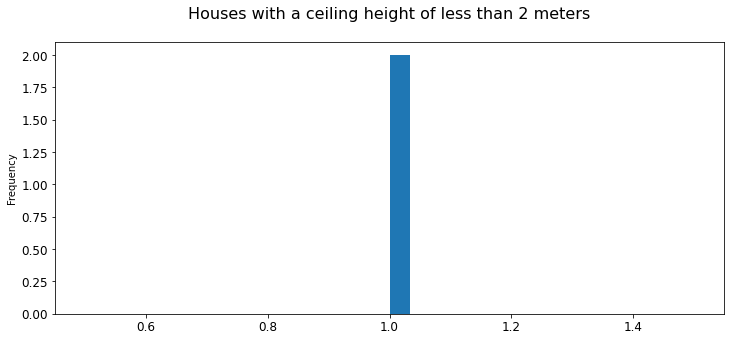

In [43]:
(data.query('ceiling_height < 2')['ceiling_height']
 
     .plot(kind= 'hist',
           
           bins=30, 
           
           figsize=(12,5), 
           
           legend = False, 
           
           fontsize = 12)
 
     .set_title('Houses with a ceiling height less than 2 meters' + "\n", 
                
                fontsize = 16, 
                
                color = 'Black'))

We proceed to the removal of both those whose height exceeds 5 meters, and those that are less than 2 meters.

In [44]:
data = data.drop(data.query('ceiling_height > 5').index).reset_index(drop=True)

data = data.drop(data.query('ceiling_height < 2').index).reset_index(drop=True)

In [45]:
data['ceiling_height'].describe()

count    23331.000000
mean         2.861300
std          0.386837
min          2.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: ceiling_height, dtype: float64

In [46]:
100 - ((data['ceiling_height'].count() / 23363) * 100) 

0.13696871121003085

0.14% of the data in this column has been deleted.

In [47]:
data['floors_total'].describe()

count    23246.000000
mean        10.718575
std          6.616837
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

The maximum height of 60 floors does not attract much attention, given that there is a 60-storey building in St. Petersburg.

In [48]:
data['living_area'].describe()

count    21466.000000
mean        33.264821
std         18.073232
min          2.000000
25%         18.500000
50%         30.000000
75%         42.000000
max        279.600000
Name: living_area, dtype: float64

We see a minimum of 0 meters, since it is impossible for the living area to be 0 meters. We will conduct a more detailed analysis in the same spirit as the previous ones.

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

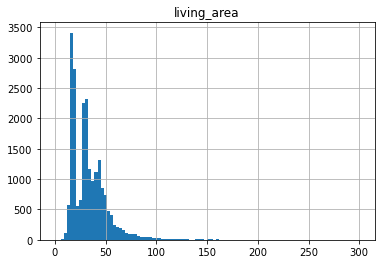

In [49]:
data.hist(
    
    'living_area', 
    
    bins=100, 
    
    range=(0, data['living_area'].median()*10))

Houses with a living area of more than 100 meters are few, and less than 10 meters are also few.

Text(0.5, 1.0, 'Houses with a living area of less than 10 meters\n')

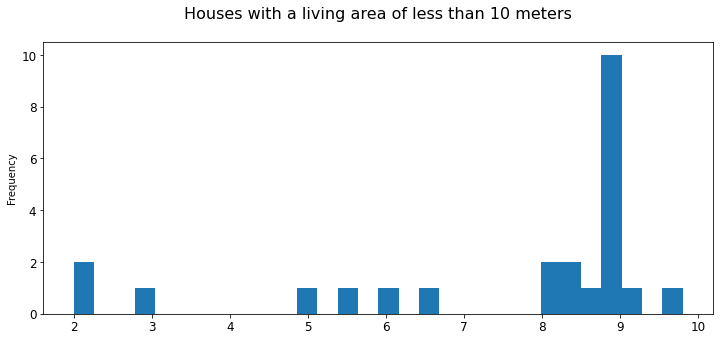

In [50]:
(data.query('living_area < 10')['living_area']
 
     .plot(kind= 'hist',
           
           bins=30, 
           
           figsize=(12,5), 
           
           legend = False, 
           
           fontsize = 12)
 
     .set_title('Houses with a living area less than 10 meters' + "\n", 
                
                fontsize = 16, 
                
                color = 'Black'))

Text(0.5, 1.0, 'Houses with a living area more than 150 meters\n')

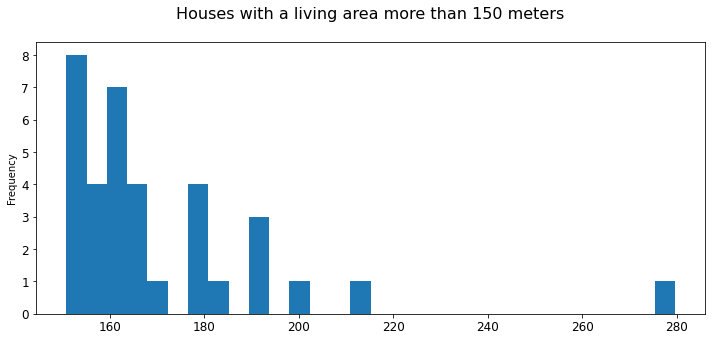

In [52]:
(data.query('living_area > 150')['living_area']
 
     .plot(kind= 'hist',
           
           bins=30, 
           
           figsize=(12,5), 
           
           legend = False, 
           
           fontsize = 12)
 
     .set_title('Houses with a living area more than 150 meters' + "\n", 
                
                fontsize = 16, 
                
                color = 'Black'))

We are starting to remove both, those whose length exceeds 150 meters and those that are less than 10 meters.

In [53]:
data = data.drop(data.query('living_area < 10').index).reset_index(drop=True)

data = data.drop(data.query('living_area > 150').index).reset_index(drop=True)

In [54]:
data['living_area'].describe()

count    21407.000000
mean        33.069007
std         17.173008
min         10.000000
25%         18.500000
50%         30.000000
75%         42.000000
max        150.000000
Name: living_area, dtype: float64

In [55]:
100 - ((data['living_area'].count() / 21466) * 100) 

0.27485325631231206

0.3% of the data in this column has been deleted.

In [56]:
data['kitchen_area'].describe()

count    21042.000000
mean        10.291743
std          5.077732
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max         70.000000
Name: kitchen_area, dtype: float64

We continue to take the same steps as before.

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

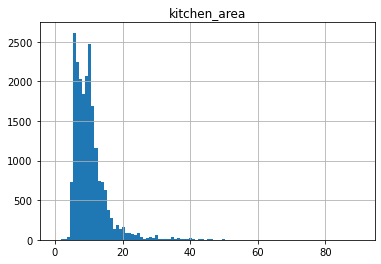

In [57]:
data.hist(
    
    'kitchen_area', 
    
    bins=100, 
    
    range=(0, data['kitchen_area'].median()*10))

You can see that there are almost no houses with kitchens more than 20 meters or less than 5. We are moving on to scaling.

Text(0.5, 1.0, 'Kitchens with more than 30 meters\n')

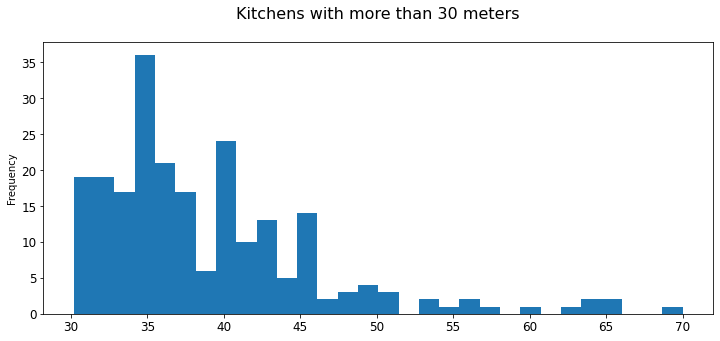

In [59]:
(data.query('kitchen_area > 30')['kitchen_area']
 
     .plot(kind= 'hist',
           
           bins=30, 
           
           figsize=(12,5), 
           
           legend = False, 
           
           fontsize = 12)
 
     .set_title('Kitchens more than 30 meters' "\n", 
                
                fontsize = 16, 
                
                color = 'Black'))

Text(0.5, 1.0, 'Kitchens less than 5 метров\n')

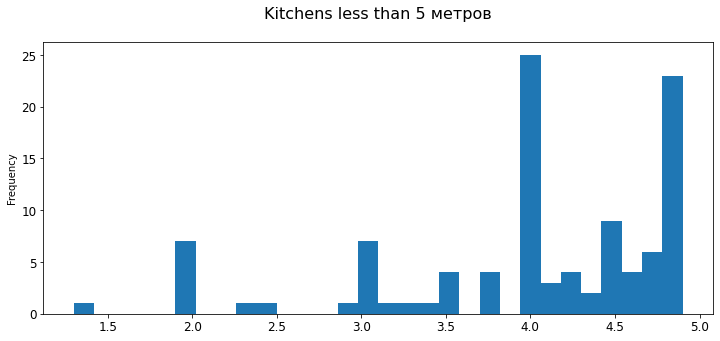

In [60]:
(data.query('kitchen_area < 5')['kitchen_area']
 
     .plot(kind= 'hist',
           
           bins=30, 
           
           figsize=(12,5), 
           
           legend = False, 
           
           fontsize = 12)
 
     .set_title('Kitchens less than 5 метров' "\n", 
                
                fontsize = 16, 
                
                color = 'Black'))

There are very few houses with a kitchen more than 30 meters and less than 5. We decided to drop these two values.

In [61]:
data = data.drop(data.query('kitchen_area < 5').index).reset_index(drop=True)

data = data.drop(data.query('kitchen_area > 30').index).reset_index(drop=True)

In [62]:
data['kitchen_area'].describe()

count    20711.000000
mean        10.010363
std          4.043044
min          5.000000
25%          7.000000
50%          9.000000
75%         11.600000
max         30.000000
Name: kitchen_area, dtype: float64

In [63]:
100 - ((data['kitchen_area'].count() / 21042) * 100) 

1.5730443874156492

We have deleted 1.6% of the data in this column.

In [ ]:
data['parks_nearest'].describe()

We leave this variable as it is, because we are not detecting any deviations.

In [65]:
data.duplicated().sum()

0

No duplicates, great! we can move on.

As a result of data processing, we eliminated those factors that could negatively affect the results of the study, and all this with a data loss of less than 5 percent.

# New Columns to the Table

We add the price per square meter to the table.

In [66]:
data['price_per_meter'] = data['last_price'] / data['total_area']

In [67]:
data['price_per_meter'].head()

0    120370.370370
1     83750.000000
2     92785.714286
3     96333.333333
4    100000.000000
Name: price_per_meter, dtype: float64

We perform the function of determining the days of the week on which the ad is published.

In [68]:
data['day'] = data['first_day_exposition'].dt.weekday

In [69]:
data['day'].unique()

array([3, 1, 0, 2, 6, 5, 4], dtype=int64)

We do the same with months.

In [70]:
data['month'] = data['first_day_exposition'].dt.month

In [71]:
data['month'].unique()

array([ 3, 12,  8,  9, 11,  4,  5,  2,  6,  7,  1, 10], dtype=int64)

The same for years.

In [72]:
data['year'] = data['first_day_exposition'].dt.year

In [73]:
data['year'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014], dtype=int64)

In [74]:
data[['day', 'month', 'year']].head()

,day,month,year
0,3,3,2019
1,1,12,2018
2,3,8,2015
3,0,9,2018
4,3,11,2017


It looks all good.

We classify floors into first, last, and others.

In [75]:
def floor_apartment(floor):
    
    if floor['floor'] == 1:
        
        return 'first_floor'
    
    elif floor['floor'] == floor['floors_total']:
        
        return 'last_floor'
    
    else:
        
        return 'other'
    
data['floor_apartment'] = data.apply(floor_apartment, axis = 1)

data['floor_apartment'].unique()
    

array(['other', 'first_floor', 'last_floor'], dtype=object)

We change the distance metric to the city center and the airport in km for better reading.

In [76]:
data['km_to_center'] = (data['cityCenters_nearest'] / 1000).round()

data['km_to_airports'] = (data['airports_nearest'] / 1000).round()

In [77]:
data[['km_to_center', 'km_to_airports']]

,km_to_center,km_to_airports
0,16.0,19.0
1,19.0,13.0
2,14.0,22.0
3,NaN,NaN
4,19.0,53.0
...,...,...
22936,4.0,25.0
22937,NaN,NaN
22938,NaN,NaN
22939,10.0,39.0


# Research Analysis

We will study the following variables using the mean and median, and then proceed to visualization.

In [78]:
data['total_area'].median()

51.0

50 percent of the data in this column has a value below 51, and the remaining 50 percent is above that value.

In [79]:
data['total_area'].mean()

57.30112026502768

The average value is 6 meters higher than the median value.

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

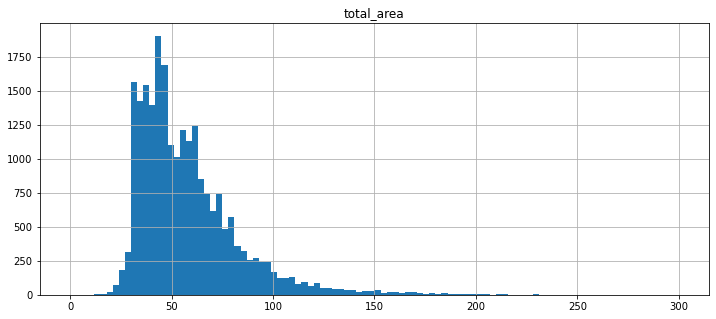

In [80]:
data.hist(
    
    'total_area',
    
    range=(0, 300),
    
    bins = 100,
    
    figsize = (12, 5),

)

The graph shows that the areas of most houses are located at a distance of 30 to 50 meters, while the modal value is about 45 meters.

In [81]:
data['living_area'].median()

30.0

The median living area is 30 meters.

In [82]:
data['living_area'].mean()

32.89764350459901

The average value is two meters higher than the other one, which means that these two values are almost the same.

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

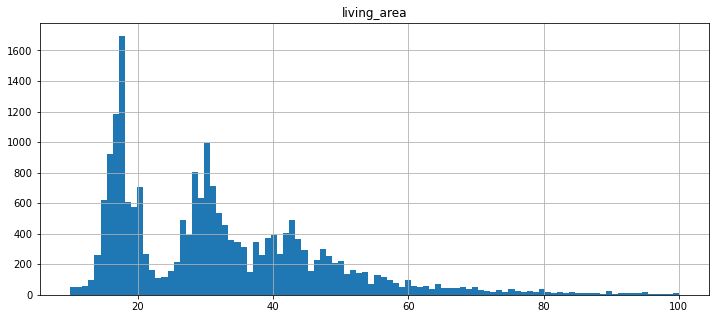

In [83]:
data.hist(
    
    'living_area',
    
    range=(10, 100),
    
    bins = 100,
    
    figsize = (12, 5),

)


As for the living area, the most common is 18 meters.

In [84]:
data['last_price'].mean()

5606250.591735321

The average price assumes a million rubles more than the previous one, although the difference is large, the result does not arouse suspicion, because there are housing with very different prices, higher prices affect. In this case, it is not necessarily a bad signal, it is within the expected range.

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

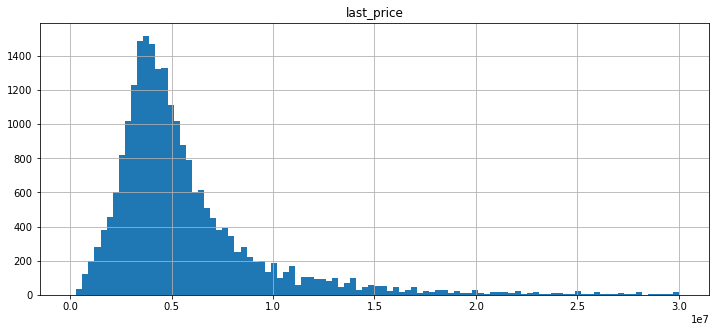

In [85]:
data.hist(
    
    'last_price',
    
    range=(0, 30000000),
    
    bins = 100,
    
    figsize = (12, 5),

)


The most popular prices are from 4 to 5 million. This more or less corresponds to the statistical values given above.

In [86]:
data['rooms'].median()

2.0

The median number of rooms is two.

In [87]:
data['rooms'].mean()

2.0222745303169

We see that the average value is the same.

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

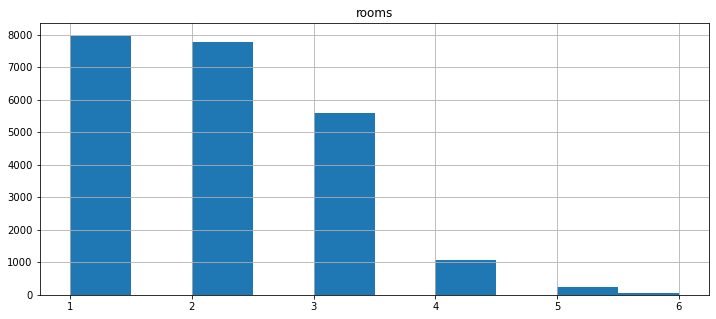

In [88]:
data.hist(
    
    'rooms',
    
    range=(1, 6),
    
    bins = 10,
    
    figsize = (12, 5),

)


The most popular houses are one and two bedroom houses.

In [89]:
data['kitchen_area'].median()

9.0

The median size of the kitchen is 9 meters.

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

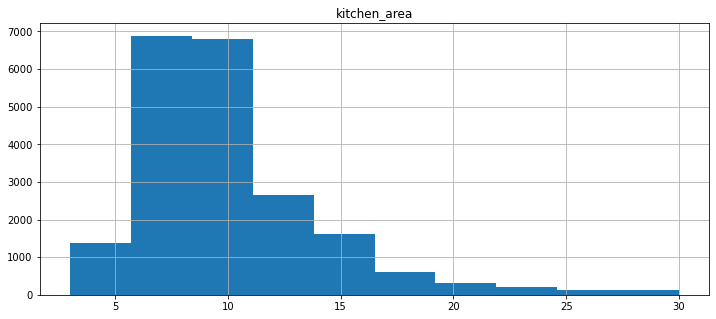

In [90]:
data.hist(
    
    'kitchen_area',
    
    range=(3, 30),
    
    bins = 10,
    
    figsize = (12, 5),

)

The sizes of kitchens, which are most often found, range from 6 to 10 meters. Kitchens less than 5 meters and kitchens more than 10 meters are the ones that have the least presence in the dataset.

In [91]:
data['ceiling_height'].median()

3.0

In [92]:
data['ceiling_height'].mean()

2.859639945948302

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

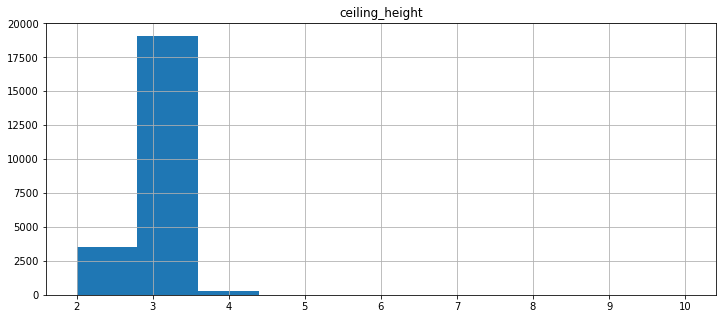

In [93]:
data.hist(
    
    'ceiling_height',
    
    range=(2, 10),
    
    bins = 10,
    
    figsize = (12, 5),

)

The ceiling height ranges from about 2.8 to 3.5 meters. Within the parameters indicated by the mean and median value.

In [94]:
data['floor'].median()

4.0

The median is the fourth floor.

In [95]:
data['floor'].mean()

5.902750533978467

The mean is the sixth floor.

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

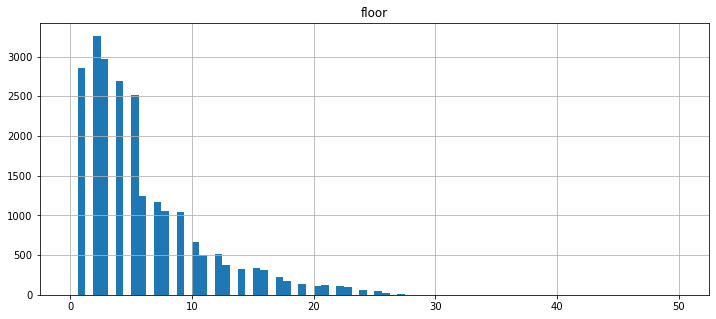

In [96]:
data.hist(
    
    'floor',
    
    range=(0, 50),
    
    bins = 80,
    
    figsize = (12, 5),

)

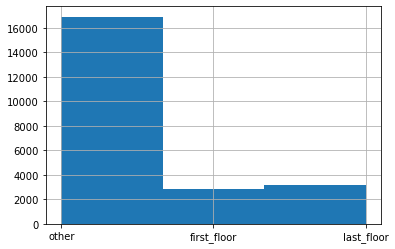

In [97]:
import matplotlib.pyplot as plt

data['floor_apartment'].hist(bins=3)

plt.show()

The largest number of houses is in the other category, that is, any floor except the first and last.

In [98]:
data['floors_total'].median()

9.0

The median shows us that half of the buildings have a height of less than 9 floors, and the other half is more than 9 floors.

In [99]:
data['floors_total'].mean()

10.741928427683963

The average value indicates a height of almost 11 floors.

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

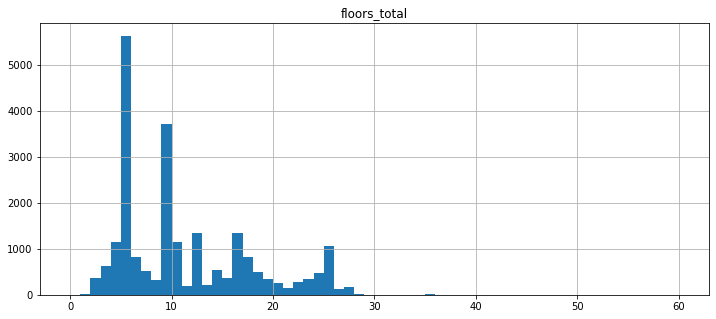

In [100]:
data.hist(
    
    'floors_total',
    
    range=(0, 60),
    
    bins = 60,
    
    figsize = (12, 5),

)

The graph shows two peaks, one on the fifth floor and one on the 9th floor.

In [101]:
data.query('locality_name == "Санкт-Петербург"')['km_to_center'].median()

12.0

Residential buildings located in St. Petersburg are located at a median distance of 12 km from the center.

In [102]:
data.query('locality_name == "Санкт-Петербург"')['km_to_center'].mean()

11.790648104975688

The average value, we can say, almost coincides with the median.

<AxesSubplot:>

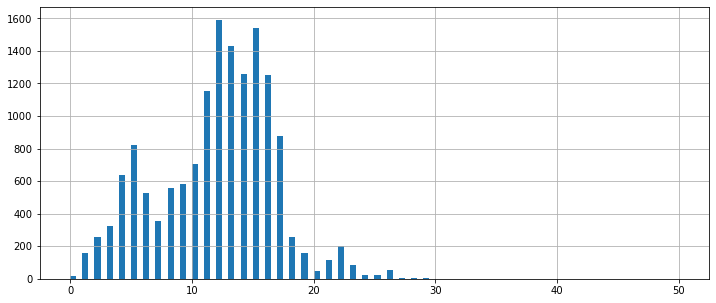

In [103]:
(data.query('locality_name == "Санкт-Петербург"')['km_to_center'].hist(
    
    range=(0, 50),
    
    bins = 100,
    
    figsize = (12, 5),

))

It seems that most of the houses are located within 12-15 km from the city center.

In [104]:
data.query('locality_name != "Санкт-Петербург"')['km_to_center'].median()

30.0

In other localities , the median reaches 30 km .

In [105]:
data.query('locality_name != "Санкт-Петербург"')['km_to_center'].mean()

30.209931368591036

The mean coincides with the median.

<AxesSubplot:>

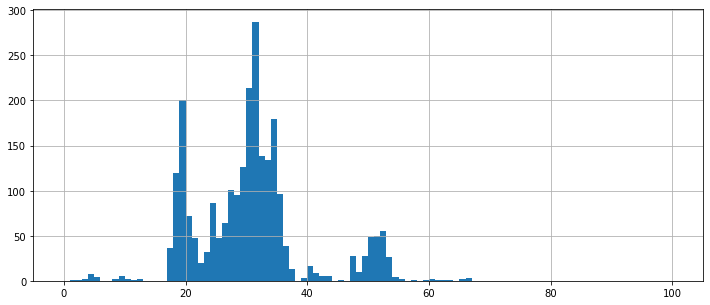

In [106]:
(data.query('locality_name != "Санкт-Петербург"')['km_to_center'].hist(
    
    range=(0, 100),
    
    bins = 100,
    
    figsize = (12, 5),

))

In other settlements, housing is located 20-35 km from the city center.

In [107]:
data['km_to_airports'].median()

27.0

In [108]:
data['km_to_airports'].mean()

28.84024041213509

50 percent of the houses are located within a radius of less than 27 km from the airport, and the remaining 50 percent are above this figure.
On average, two kilometers more.

data.hist(
    
    'km_to_airports',
    
    range=(0, 100),
    
    bins = 50,
    
    figsize = (12, 5),

)

The graph shows that the housing is located 17, 19 and 22 km from the airport, and slightly less at 38 km.

In [111]:
data['parks_nearest'].median()

457.0

In [112]:
data['parks_nearest'].mean()

494.35340314136124

The houses have parks at a median distance of 457 meters and an average of 494 meters.

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

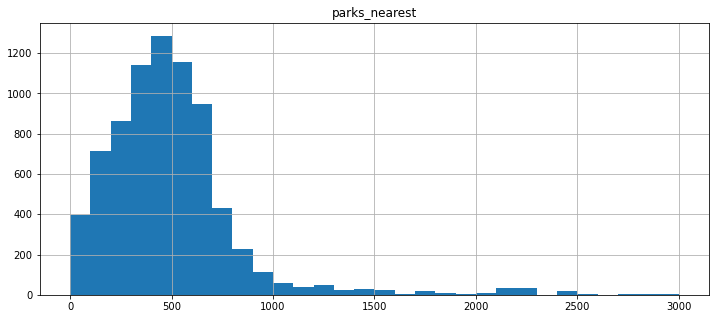

In [113]:
data.hist(
    
    'parks_nearest',
    
    range=(0, 3000),
    
    bins = 30,
    
    figsize = (12, 5),

)

Most of the houses nearby have a park, the distance to which is about 500 meters.

In [114]:
data['day'].median()

3.0

In [115]:
data['day'].mean()

2.570201822065298

The mean and median are almost the same, and their number corresponds to Thursday.

array([[<AxesSubplot:title={'center':'day'}>]], dtype=object)

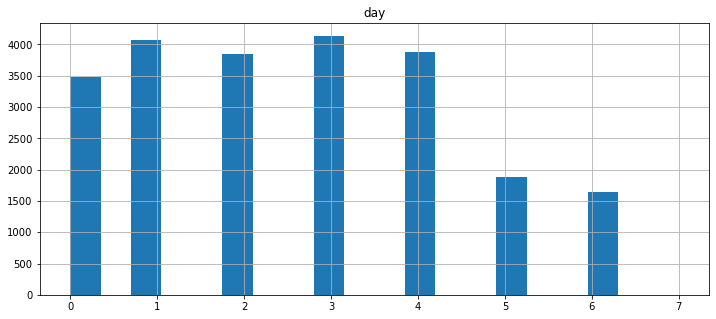

In [116]:
data.hist(
    
    'day',
    
    range=(0, 7),
    
    bins = 20,
    
    figsize = (12, 5),

)

More ads are placed on weekdays than on weekends.

In [117]:
data['month'].median()

6.0

In [118]:
data['month'].mean()

6.405431323830697

The mean and median are the same and correspond to the month of June.

array([[<AxesSubplot:title={'center':'month'}>]], dtype=object)

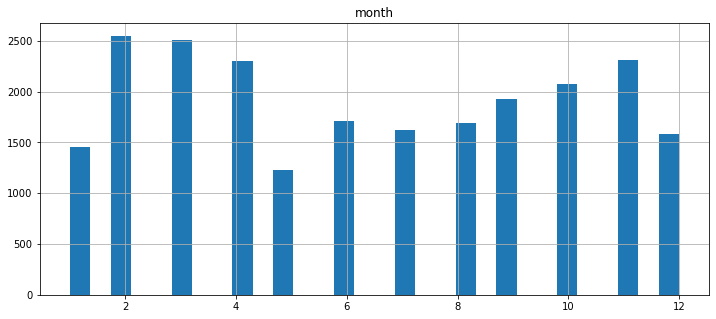

In [119]:
data.hist(
    
    'month',
    
    range=(1, 12),
    
    bins = 30,
    
    figsize = (12, 5),

)

From February to April, more ads are published than the rest of the year. From August to November, there is an upward trend.

# Analysis of the Speed of Home Sales in Days

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

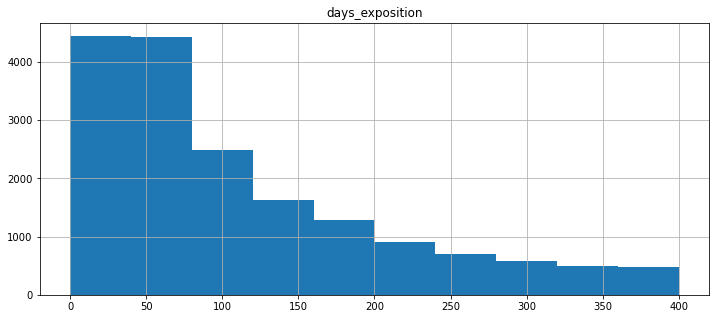

In [120]:
data.hist(
    
    'days_exposition',
    
    range=(0, 400),
    
    bins = 10,
    
    figsize = (12, 5),

)

In [121]:
data['days_exposition'].describe()

count    19936.000000
mean       178.442215
std        216.789643
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

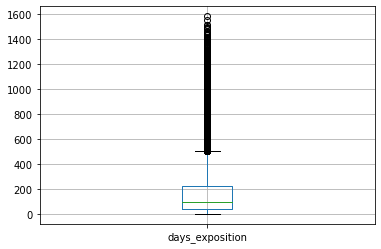

In [122]:
data.boxplot(column='days_exposition')

Taking into account the typical deviation, we can say that the data are highly variable, so in this case it is better to use as a guideline the median, which represents the value for 95 days.

We can say that an apartment that sells quickly is one that sells in 45 days or less, the remaining 75% take more than 45 days. An apartment that takes time to sell is an apartment that takes more than 232 days, which corresponds to the third quartile.

In [123]:
data.groupby(by='days_exposition')['last_price'].count().sort_values(ascending=False)

days_exposition
45.0      876
60.0      536
7.0       229
30.0      201
90.0      179
         ... 
982.0       1
984.0       1
985.0       1
986.0       1
1580.0      1
Name: last_price, Length: 1126, dtype: int64

As a rule, houses are sold within 45 days. The second most important group is those that are sold within 60 days.

# Analysis of the Relationship of Housing Prices with other Factors

Next, we will move on to analyzing the dependencies between last_price and total_area.

In [124]:
data['last_price'].corr(data['total_area'])

0.7789351790961012

The correlation between these two variables is high and positive.

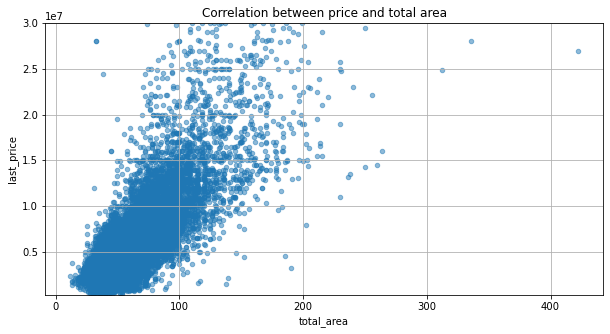

In [125]:
data.plot(
    
    x='total_area',
    
    y='last_price',
    
    kind='scatter',
    
    alpha=0.5,
    
    grid=True,
    
    figsize=(10,5)


).set_title('Correlation between price and total area')

plt.ylim(300000, 30000000)

plt.show()

The more meters in the house, the more expensive it is.

In [126]:
data['last_price'].corr(data['living_area'])

0.6857496193974713

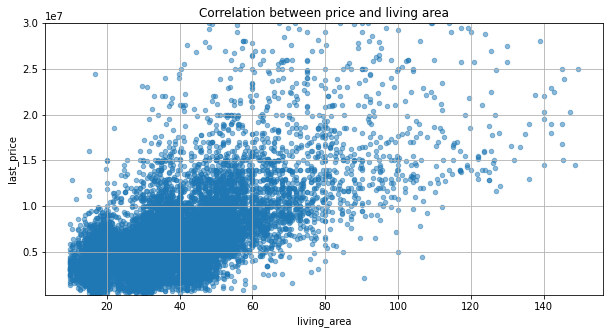

In [128]:
data.plot(
    
    x='living_area',
    
    y='last_price',
    
    kind='scatter',
    
    alpha=0.5,
    
    grid=True,
    
    figsize=(10,5)
    
).set_title('Correlation between price and living area')

plt.ylim(300000, 30000000)

plt.show()

There is a strong positive correlation between price and living space. Apartments with a larger living area are the most valuable.

In [129]:
data['last_price'].corr(data['kitchen_area'])

0.5711444257158161

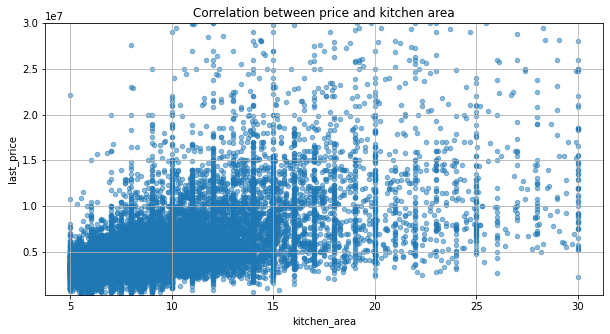

In [130]:
data.plot(
    
    x='kitchen_area',
    
    y='last_price',
    
    kind='scatter',
    
    alpha=0.5,
    
    grid=True,
    
    figsize=(10,5)


).set_title('Correlation between price and kitchen area')

plt.ylim(300000, 30000000)

plt.show()

There is a notable positive correlation between the price and the kitchen area. Apartments with a larger kitchen area are more expensive.

In [131]:
data['last_price'].corr(data['rooms'])

0.5055689607377912

The correlation coefficient shows that there is a notable relationship between these two variables.

We create a pivot table to study the relationship between rooms and price, and then proceed to its visualization.

In [132]:
pivot_rooms = data.pivot_table(
    
    index=['rooms'],
    
    values=['last_price'],
    
    aggfunc='median')

pivot_rooms.head()

,last_price
rooms,
0,2700000
1,3600000
2,4750000
3,6050000
4,8490000


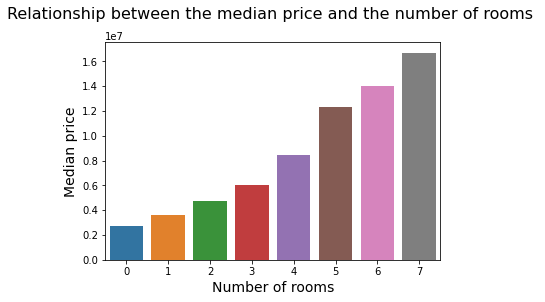

In [133]:
import seaborn as sns

sns.barplot(data=pivot_rooms,
            
            x=pivot_rooms.index,
            
            y='last_price')

plt.title('Relationship between the median price and the number of rooms \n',
          
          fontsize = 16, 
          
          color = 'Black')

plt.xlabel('Number of rooms',fontsize = 14)

plt.ylabel('Median price',fontsize = 14)

plt.show()

As we can see at the graphic, the number of rooms affects the price.

We do the same with the floor_apartment variable.

In [134]:
pivot_floor_apartment = data.pivot_table(
    
    index=['floor_apartment'],
    
    values=['last_price'],
    
    aggfunc='median')

pivot_floor_apartment.head()

,last_price
floor_apartment,
first_floor,3900000
last_floor,4250000
other,4785000


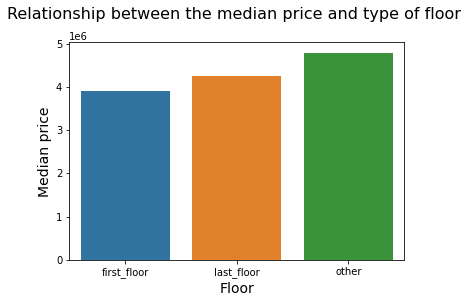

In [136]:
sns.barplot(data = pivot_floor_apartment,
            
            x = pivot_floor_apartment.index,
            
            y = 'last_price')

plt.title('Relationship between the median price and type of floor \n',
          
          fontsize = 16,
          
          color = 'Black')

plt.xlabel('Floor',fontsize = 14)

plt.ylabel('Median price',fontsize = 14)

plt.show()

The most expensive prices are in the other category, that is, neither on the first nor on the last floor. The cheapest are the ground floor. The price trend is clearly going up.

Now we are going to make a pivot table and visualize it directly to see the relationship between the price and the day of the week.

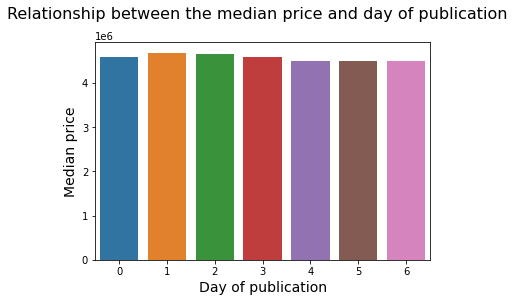

In [138]:
day_price = data.pivot_table(
    
    index=['day'],
    
    values=['last_price'],
    
    aggfunc='median')

sns.barplot(data = day_price,
            
            x = day_price.index,
            
            y = 'last_price')

plt.title('Relationship between the median price and day of publication  \n',
          
          fontsize = 16,
          
          color = 'Black')

plt.xlabel('Day of publication',fontsize = 14)

plt.ylabel('Median price',fontsize = 14)

plt.show()


The most expensive offers are published on Tuesdays and Wednesdays, but since Thursday there has been a downward trend.

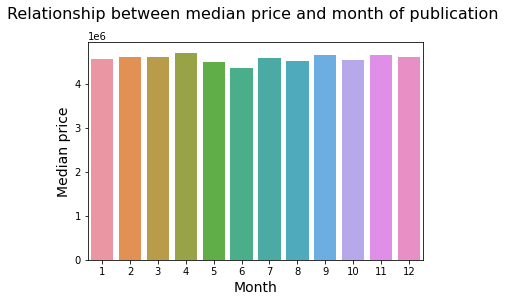

In [139]:
month_price = data.pivot_table(
    
    index=['month'],
    
    values=['last_price'],
    
    aggfunc='median')

sns.barplot(data = month_price,
            
            x = month_price.index,
            
            y = 'last_price')

plt.title('Relationship between median price and month of publication \n',
          
          fontsize = 16,
          
          color = 'Black')

plt.xlabel('Month',fontsize = 14)

plt.ylabel('Median price',fontsize = 14)

plt.show()


There is a relationship between these two factors. From February to April, the trend goes up, from May to June it falls, and then it recovers in June, September and November with a fall between these months.

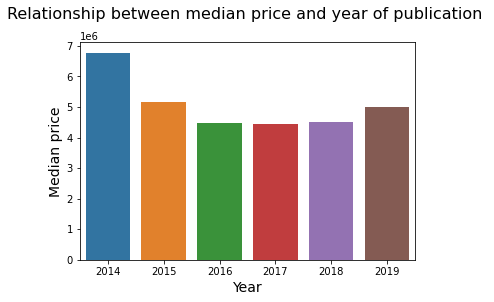

In [140]:
year_price = data.pivot_table(
    
    index=['year'],
    
    values=['last_price'],
    
    aggfunc='median')

sns.barplot(data = year_price,
            
            x = year_price.index,
            
            y = 'last_price')

plt.title('Relationship between median price and year of publication \n',
          
          fontsize = 16,
          
          color = 'Black')

plt.xlabel('Year',fontsize = 14)

plt.ylabel('Median price',fontsize = 14)

plt.show()

The average price has been falling sharply since 2014 to stabilize at a level significantly lower than in the period from 2016 to 2018, with a slight increase until 2019. This may be due to the geopolitical and economic upheavals that have occurred in Russia over the past 6 years.

# Analysis of the Price per Square Meter in 10 Localities

We will use a summary table to analyze the average price in 10 localities

In [142]:
localities_price = data.pivot_table(
    
    index=['locality_name'],
    
    values=['price_per_meter'],
                                        
    aggfunc=['count','mean']).round().sort_values(
    
    by=('count', 'price_per_meter'),
    
    ascending=False)

In [143]:
localities_price.head(10)

,count,mean
,price_per_meter,price_per_meter
locality_name,,
Санкт-Петербург,15064,110031.0
Мурино,582,85953.0
Кудрово,470,95425.0
Шушары,436,78593.0
Всеволожск,397,68610.0
Пушкин,357,102800.0
Колпино,337,75358.0
Парголово,327,90178.0


The highest prices are in St. Petersburg, Pushkin and Kudrovo. The lowest prices in Vyborg.

# Study of the Distance from Housing to the Center and its Prices

First we are going to analyze the correlation between these two variables, and then generate a pivot table to complete the check.

In [144]:
data['last_price'].corr(data['km_to_center'])

-0.34735145680032287

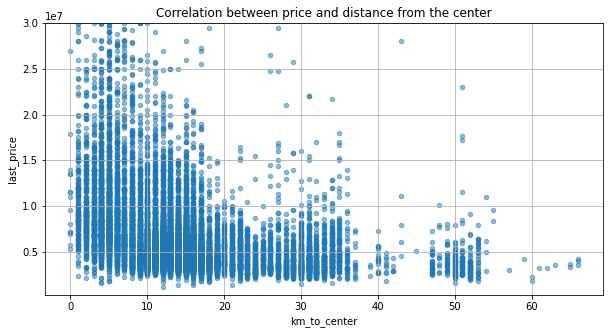

In [145]:
data.plot(
    
    x='km_to_center',
    
    y='last_price',
    
    kind='scatter',
    
    alpha=0.5,
    
    grid=True,
    
    figsize=(10,5)


).set_title('Correlation between price and distance from the center')

plt.ylim(300000, 30000000)

plt.show()

As we can see, there is a certain negative correlation, which means that the further away from the center there is housing, the cheaper it is, and vice versa. However, the correlation is weak.

We are creating a pivot table for St. Petersburg to see if the correlation remains the same.

In [146]:
center_price = data.query(
    
    'locality_name == "Санкт-Петербург"').pivot_table(
    
    index=['km_to_center'],
    
    values=['last_price'],
    
    aggfunc='mean').round()


In [147]:
center_price.head(10)

,last_price
km_to_center,
0.0,11318667.0
1.0,11451720.0
2.0,10597609.0
3.0,9635762.0
4.0,10078325.0
5.0,10466074.0
6.0,9353749.0
7.0,8973358.0
8.0,8461597.0


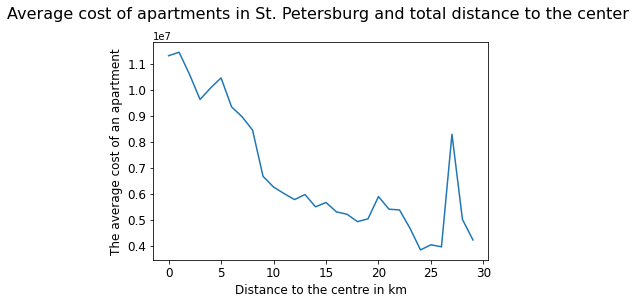

In [153]:
center_price.plot(y='last_price',
                                  
                                  figsize=(6,4), 
                                  
                                  legend = False, 
                                  
                                  fontsize = 12).set_title(
    
    'Average cost of apartments in St. Petersburg and total distance to the center \n', 
    
                                       fontsize = 16, 
                                       
                                       color = 'Black')

plt.xlabel('Distance to the centre in km',fontsize = 12)

plt.ylabel('The average cost of an apartment',fontsize = 12)

plt.show()

Considering only St. Petersburg, the graph shows the relationship between these two variables, as we see how the price falls as we move away from the center in kilometers.

Now let's see how much each kilometer costs.

In [154]:
def km_price(data):

    for i in range(data.shape[0] - 1):

        data.loc[i,'km_price'] = data.loc[i,'last_price'] - data.loc[i + 1,'last_price']
    
    return data

In [155]:
center_price = km_price(center_price)

center_price.head(20)

,last_price,km_price
km_to_center,,
0.0,11318667.0,-133053.0
1.0,11451720.0,854111.0
2.0,10597609.0,961847.0
3.0,9635762.0,-442563.0
4.0,10078325.0,-387749.0
5.0,10466074.0,1112325.0
6.0,9353749.0,380391.0
7.0,8973358.0,511761.0
8.0,8461597.0,1778900.0


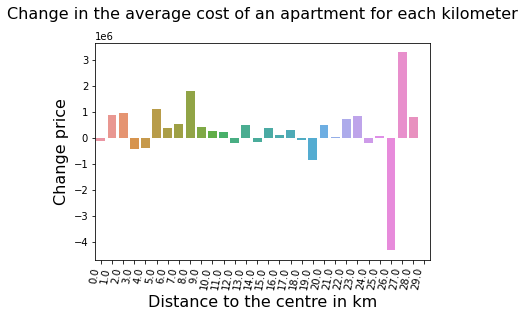

In [157]:
sns.barplot(data = center_price,
           
           x=center_price.index,
           
           y='km_price')

plt.title('Change in the average cost of an apartment for each kilometer\n', 
          
                fontsize = 16, 
          
                color = 'Black')

plt.xlabel('Distance to the centre in km',fontsize = 16)

plt.ylabel('Change price',fontsize = 16)

plt.xticks(rotation=80, fontsize=10, ha = 'right')

plt.show()

There are two sharp changes on the graph: one negative at the 26th kilometer, and the other positive at the 27th kilometer.

# Conclusion

The study was conducted on the basis of available data for the period from 2014 to 2019 on housing prices in the real estate market of St. Petersburg and its region.

Based on the data obtained, we can draw the following conclusions:

Most of the apartments are sold with an area of 50 square meters.

The smallest number of houses listed in the data are houses with an area of 25 square meters and houses with an area of 100 square meters.

Most of all, the price is affected by the area of housing.

Housing prices range from two million to eight million rubles, which is 80 percent of the ads.

The cost of an apartment on the first floor is lower than on the last.

The price is also, albeit slightly, affected by the day of the week on which the ad was published. The most expensive apartments are published on Tuesdays and Wednesdays.

The period during which the apartment is sold, as a rule, is almost 100 days. The sale period is from 45 to 240 days.

As for the distance from the center, the houses located closer to the center are more expensive.

The most expensive housing is located in St. Petersburg and Pushkin, and the cheapest in Vyborg.

### Factors that most influence the price and recommendations

1. The assessment of the total area is one of the most important variables that it affects, in this sense, the most logical recommendation is to use this parameter to detect anomalies in publications that may raise suspicions of fraud.


2. The living area strongly depends on the price, so it can serve as an amplifying factor when detecting suspicious publications.


3. The kitchen area can also serve in the same sense indicated above as an amplifier when detecting deviations, since it shows a certain dependence on the price.


4. The number of rooms can also serve as an amplifying factor, as it shows a significant correlation.


5. As we noted earlier, the day of the week affects the price, reaching a peak on Tuesday and a significant drop on the weekend. 


6. As for the month of publication, we observed a peak in April, and a sharp drop in June.


7. As for the year, since 2014 there has been a continuous decline, and since 2018 there has been a moderate recovery. A sharp drop may make sense if we take into account the economic and political events that have occurred in Russia over the years.


8. As for the distance from the center, this factor strongly affects the St. Petersburg area, so it would be strongly recommended to use it for fraud detection purposes.